In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x=df.iloc[:, [3,4]].values

In [4]:
from sklearn.cluster import HDBSCAN
hdb=HDBSCAN(min_cluster_size=5,min_samples=5)
y=hdb.fit_predict(x)
y

array([-1,  5,  1,  5, -1,  5,  1, -1,  1,  5,  1, -1,  1,  5,  1,  5,  3,
        5,  3, -1,  3,  5,  1,  5,  1,  5,  3, -1,  3, -1,  1,  5,  1, -1,
        1,  5,  1,  5, -1, -1,  4, -1,  4,  4, -1,  5,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  4,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  4,  0,  2,  0,  2,  0,  2,  0, -1, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,  0,  2,  0, -1,  0,  2,
       -1,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
supervised=df
supervised['cluster_value']=y
supervised.to_csv("hdbscan_clustered_data.csv", index=False)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_value
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


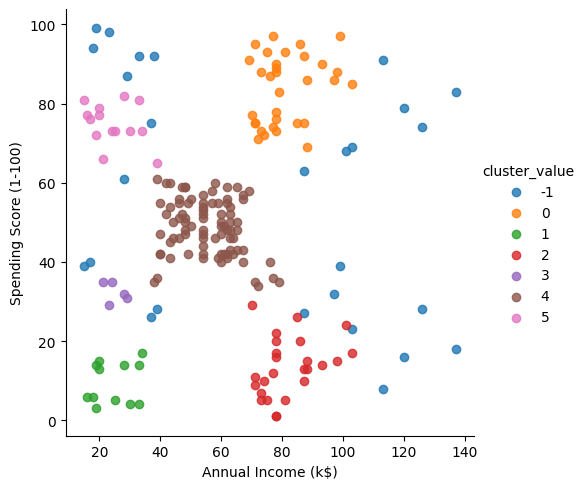

In [6]:
import seaborn as sns
facet=sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                 fit_reg=False, legend=True, legend_out=True)